In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"

df_pokemon=pd.read_csv(url)

Tus Misiones

FASE 1: Limpieza e Ingeniería (Feature Engineering)

* Explora: Haz un head() y un info().

  * Pregunta: ¿Qué columna tiene muchos valores nulos? (Es lógico, no todos los Pokémon tienen un segundo tipo).

  * Acción: Rellena esos nulos con el texto "Ninguno" o "None".

* Crea una nueva variable:

  * No tenemos una columna de "Poder Total" fiable.

  * Crea una columna llamada Fuerza_Total que sea la suma de: HP + Attack + Defense + Sp. Atk + Sp. Def + Speed.

* Pista: Puedes sumar columnas directamente: df['A'] + df['B']... o usar df.iloc[:, 4:10].sum(axis=1) si te sientes valiente.


In [2]:
df_pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [3]:
df_pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [11]:
fuerza_total=['HP','Attack','Defense','Sp. Atk', 'Sp. Def', 'Speed']
df_pokemon['Fuerza_Total']=df_pokemon[fuerza_total].sum(axis=1)
df_pokemon

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Fuerza_Total
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,600
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,700
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,600
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,680


FASE 2: Análisis de Grupo (Los Mitos)

* Legendarios vs Normales:

  * Agrupa por la columna Legendary (es True/False).

  * Calcula el promedio de tu nueva columna Fuerza_Total.

  * Pregunta: ¿Cuánta diferencia de poder real hay entre un legendario y un normal?

In [13]:
df_pokemon.groupby('Legendary')['Fuerza_Total'].mean()

Legendary
False    417.213605
True     637.384615
Name: Fuerza_Total, dtype: float64

FASE 3: El Gráfico Complejo (Scatter + Hue)

* Queremos ver si los Pokémon más rápidos son también los más débiles (defensa baja).

  * Haz un Scatter Plot.

  * Eje X: Defense

  * Eje Y: Speed

  * Hue: Legendary (Para ver dónde se ubican los dioses).

* Reto: ¿Ves alguna correlación o es una nube dispersa?


Text(0.5, 1.0, 'Pokemones rapidos vs defensa')

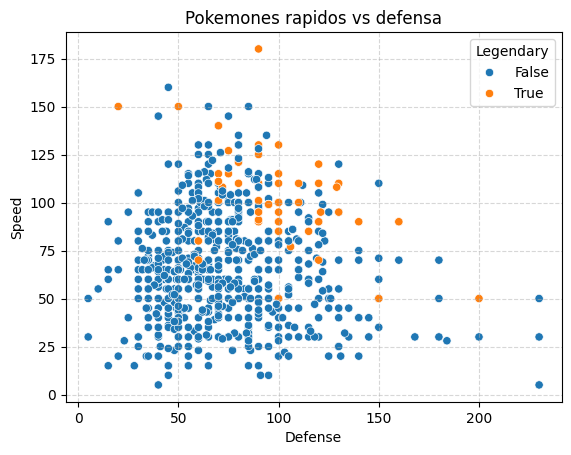

In [17]:
sns.scatterplot(x=df_pokemon['Defense'],y=df_pokemon['Speed'],hue=df_pokemon['Legendary'])
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.title('Pokemones rapidos vs defensa')

FASE 4: El Filtro Avanzado (Buscando al Campeón)

* Encuentra un Pokémon que cumpla esto (y muéstrame su nombre):

  * Que NO sea Legendario (Legendary == False).

  * Que sea de Tipo 1 (Type 1) "Fire" (Fuego).

  * Que tenga un Ataque (Attack) mayor a 100.

In [27]:
campeon=df_pokemon[(df_pokemon['Legendary']==False)&(df_pokemon['Type 1']=='Fire')&(df_pokemon['Attack']>100)]
campeon

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Fuerza_Total
7,6,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False,634
8,6,CharizardMega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False,634
64,59,Arcanine,Fire,NaN,90,110,80,100,80,95,1,False,555
147,136,Flareon,Fire,NaN,65,130,60,95,110,65,1,False,525
278,257,Blaziken,Fire,Fighting,80,120,70,110,70,80,3,False,530
279,257,BlazikenMega Blaziken,Fire,Fighting,80,160,80,130,80,100,3,False,630
354,323,CameruptMega Camerupt,Fire,Ground,70,120,100,145,105,20,3,False,560
437,392,Infernape,Fire,Fighting,76,104,71,104,71,108,4,False,534
559,500,Emboar,Fire,Fighting,110,123,65,100,65,65,5,False,528
615,555,DarmanitanStandard Mode,Fire,NaN,105,140,55,30,55,95,5,False,480


In [26]:
print(df_pokemon[['Defense', 'Speed']].corr())

          Defense     Speed
Defense  1.000000  0.015227
Speed    0.015227  1.000000
